In [1]:
%%HTML
<style>
    .container { width: 99%; }
</style>

In [2]:
%run 'src/timestamps.py'

create_timestamps()

In [3]:
import pandas as pd
import json

def load_dataset(file):
    return pd.read_json('datasets/' + file + '.json', lines=True)

In [4]:
dataset = load_dataset('radar')

In [5]:
df = pd.DataFrame('', index=[0], columns=['callsign', 'date', 'lat', 'lon', 'alt'])

In [6]:
df_template = df.copy()

In [7]:
%%time
for x in range(0, len(dataset)):
    if x > 0:
        df = df.append(df_template, ignore_index=True)
    if dataset[0][x] != None:
        df.loc[x] = pd.DataFrame(dataset[0][x], index=[0]).values[0]
    else:
        df.loc[x] = pd.DataFrame({'callsign': '', 'date': 0, 'lat': 0, 'lon': 0, 'alt': 0}, index=[0]).values[0]

CPU times: user 2.33 s, sys: 43.9 ms, total: 2.37 s
Wall time: 2.37 s


In [8]:
df['date_time'] = ''

In [9]:
for i in range(0, len(dataset)):
    df['date_time'][i] = get_timestamp(i)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date']      = pd.to_datetime(df['date'])
df['lat']       = pd.to_numeric(df['lat'])
df['lon']       = pd.to_numeric(df['lon'])
df['alt']       = pd.to_numeric(df['alt'])

In [11]:
df = df.set_index(df['date_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1902 entries, 2020-11-26 05:15:22 to 2020-11-27 12:56:22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  1902 non-null   datetime64[ns]
 1   callsign   1902 non-null   object        
 2   date       1902 non-null   datetime64[ns]
 3   lat        1902 non-null   float64       
 4   lon        1902 non-null   float64       
 5   alt        1902 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 104.0+ KB


In [13]:
df.describe()

,lat,lon,alt
count,1902.000000,1902.000000,1902.000000
mean,2.550758,13.696664,465.106628
std,4.361672,23.417656,1030.091989
min,0.000000,0.000000,-0.008333
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,9.782245,53.628698,0.000000
max,10.240888,53.864398,4999.950000


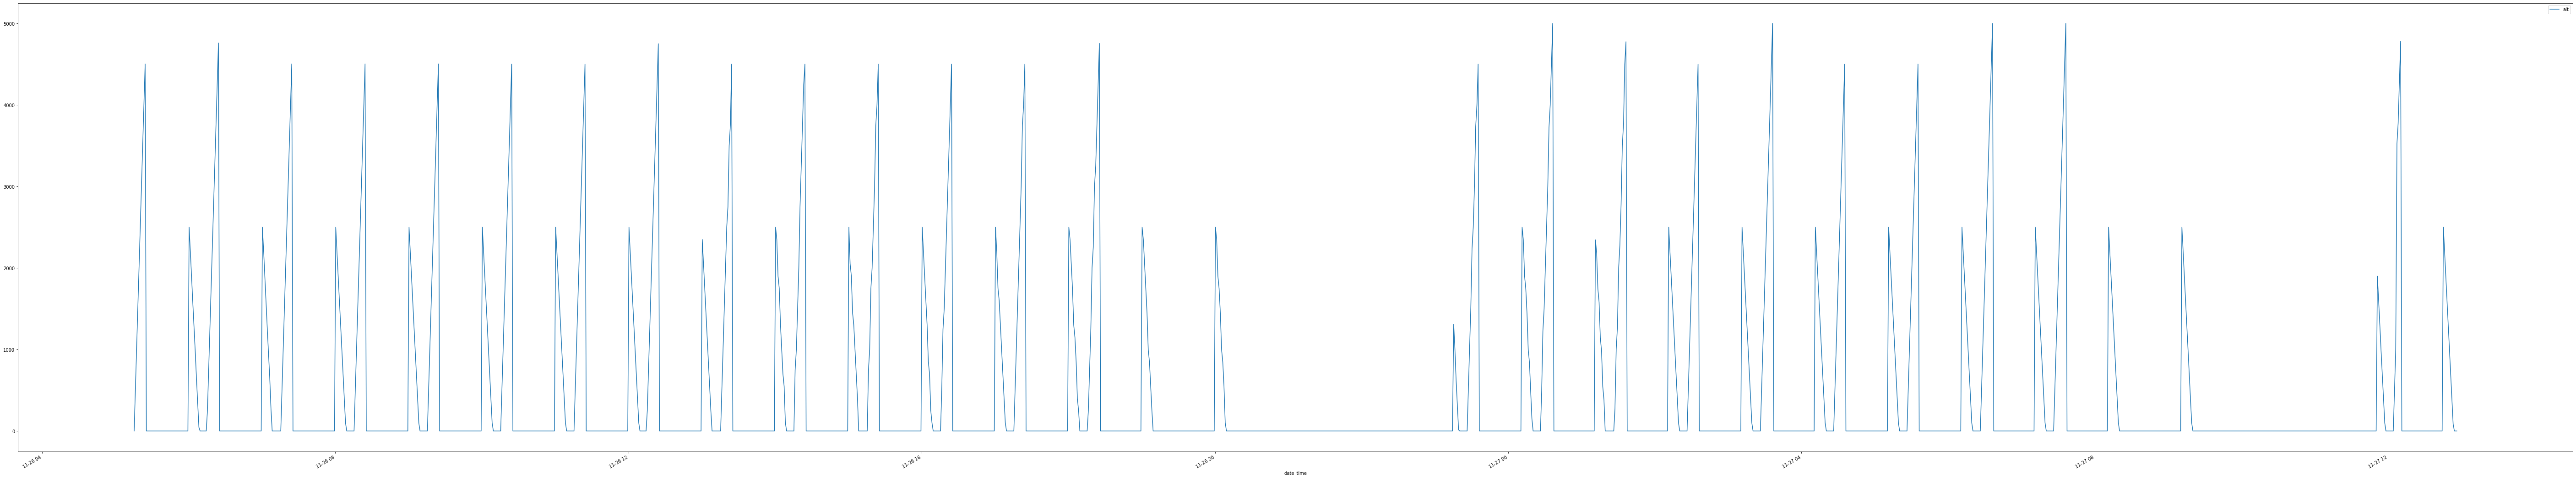

In [14]:
ax = df.loc[:, df.columns.difference(['date', 'lat', 'lon'])].plot(x='date_time', figsize=(100,20))
fig = ax.get_figure()
fig.savefig('plots/radar_takeoff_landing.pdf')

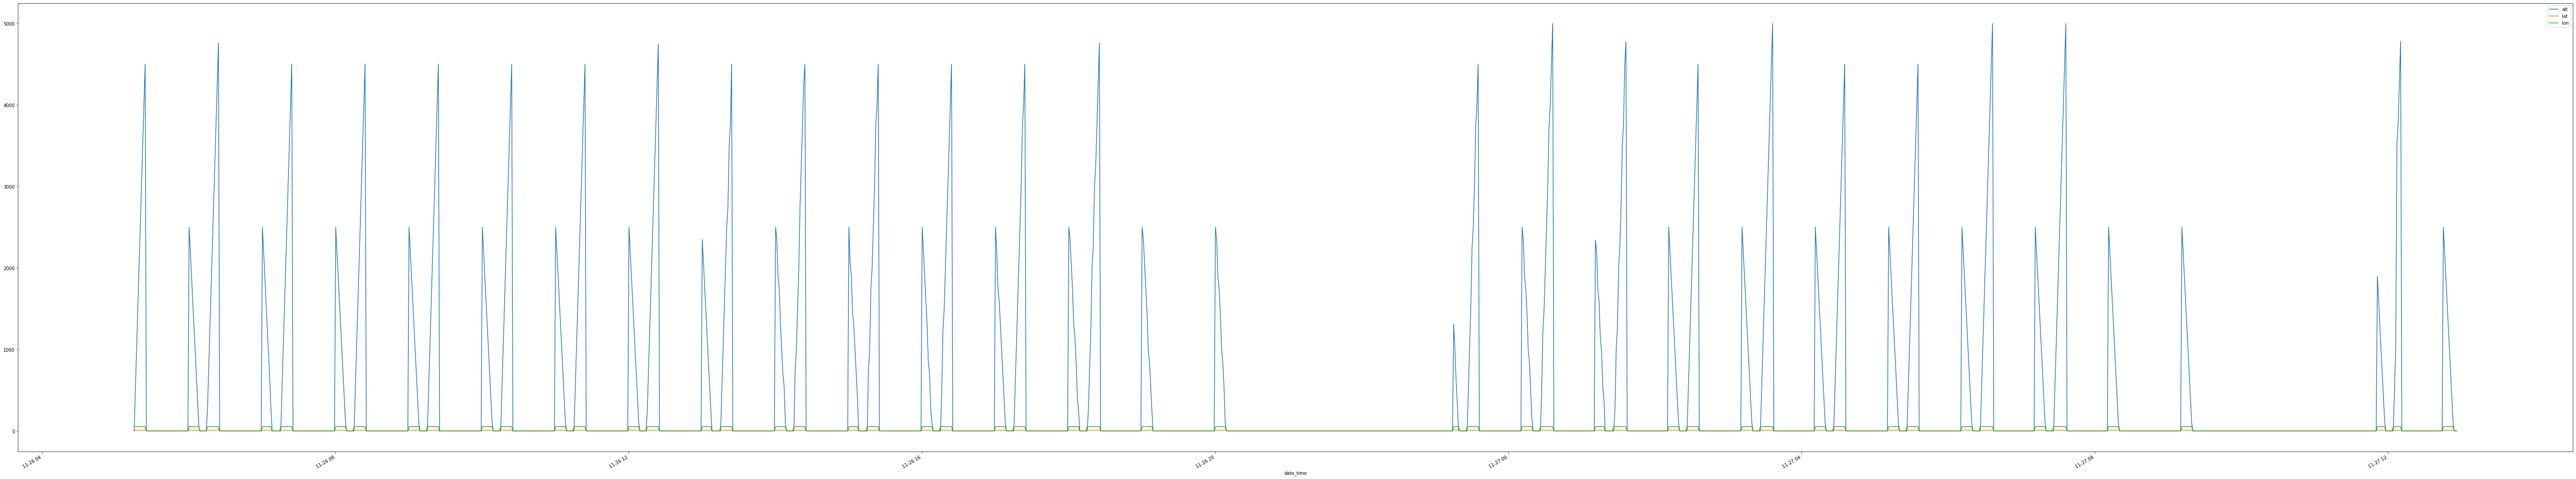

In [15]:
ax  = df.loc[:, df.columns.difference(['date'])].plot(x='date_time', figsize=(100,20))
fig = ax.get_figure()
fig.savefig('plots/radar.pdf')

In [16]:
df_not_null = df['date'] != '1970-01-01 00:00:00.000000000'

In [17]:
df[df_not_null]

,date_time,callsign,date,lat,lon,alt
date_time,,,,,,
2020-11-26 05:15:22,2020-11-26 05:15:22,BAW965,1970-01-01 00:26:46.125621293,9.997445,53.628698,0.000000
2020-11-26 05:16:22,2020-11-26 05:16:22,BAW965,1970-01-01 00:26:46.125681323,9.973863,53.652280,500.250000
2020-11-26 05:17:22,2020-11-26 05:17:22,BAW965,1970-01-01 00:26:46.125741364,9.950277,53.675866,1000.591667
2020-11-26 05:18:22,2020-11-26 05:18:22,BAW965,1970-01-01 00:26:46.125801394,9.926695,53.699448,1500.841667
2020-11-26 05:19:22,2020-11-26 05:19:22,BAW965,1970-01-01 00:26:46.125861424,9.903113,53.723030,2001.091667
...,...,...,...,...,...,...
2020-11-27 12:49:22,2020-11-27 12:49:22,DLH5KF,1970-01-01 00:26:46.477744993,10.119395,53.687337,1293.540000
2020-11-27 12:50:22,2020-11-27 12:50:22,DLH5KF,1970-01-01 00:26:46.477805395,10.088983,53.673155,991.530000
2020-11-27 12:51:22,2020-11-27 12:51:22,DLH5KF,1970-01-01 00:26:46.477865740,10.058599,53.658987,689.805000


<AxesSubplot:xlabel='lon', ylabel='lat'>

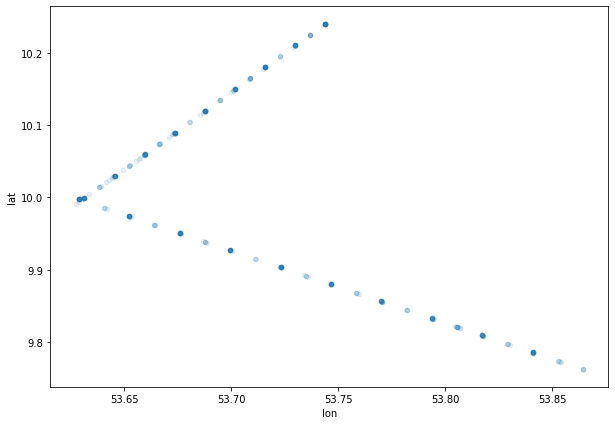

In [18]:
df[df_not_null].plot(kind="scatter", x="lon", y="lat", alpha=0.1, figsize=(10,7))

In [19]:
df['callsign'].describe()

count     1902
unique      30
top           
freq      1417
Name: callsign, dtype: object

In [20]:
pt = df[df_not_null].pivot_table(index=['callsign'], aggfunc='size')
pt

callsign
AFL2346     9
BAW965     10
DECEC      21
DEEMV       9
DLH007     18
DLH008     21
DLH1M      21
DLH2215    18
DLH5KF     17
DLH6CH     20
DLH8273    18
DLH9284    20
DLH9471    20
EIN39A     20
EWG036     14
EWG6LR     10
EWG6UC     10
EWG8461    18
EWG8ZL     17
LIB8       16
LIB9       21
LOT40M     17
PGT6XJ     18
RYR5EW     18
SAS2645    18
SIN39      22
TAP568     17
TRA6062    10
UAE59      17
dtype: int64

<AxesSubplot:ylabel='callsign'>

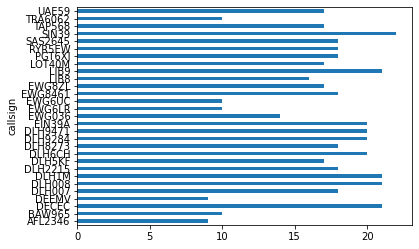

In [21]:
pt.plot.barh()